train loss:2.2988708235961233
=== epoch:1, train acc:0.422, test acc:0.395 ===
train loss:2.296716615449502
train loss:2.2869902829805477
train loss:2.2874052947107417
train loss:2.2686925560015023
train loss:2.26899493429086
train loss:2.2497630762407623
train loss:2.253363409879079
train loss:2.201655553508278
train loss:2.185400519078229
train loss:2.1698076514225755
train loss:2.104406097289217
train loss:2.0874281263891676
train loss:2.0047474762512816
train loss:1.9723036045724884
train loss:1.941764734480958
train loss:1.7808391442421572
train loss:1.8325791537698655
train loss:1.7069120836732408
train loss:1.6080400777866104
train loss:1.4872476301756439
train loss:1.492077704614062
train loss:1.295495603559267
train loss:1.2929644666324205
train loss:1.2025502129443877
train loss:1.0860741378536383
train loss:1.1446400357738968
train loss:0.9182801178504851
train loss:0.886633480179586
train loss:0.9652915221304557
train loss:0.8586824174987149
train loss:0.9038756923069071
tr

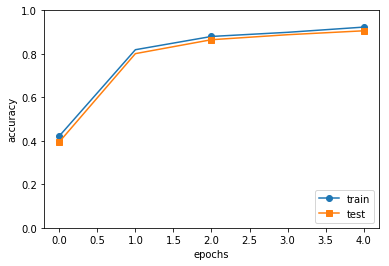

In [2]:
%matplotlib inline
import os, sys
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from simple_convnet import SimpleConvNet
from common.trainer import Trainer

# データの読み込み
(x_train, t_train), (x_test, t_test) = load_mnist(flatten=False)

# 処理に時間のかかる場合はデータを削減 
x_train, t_train = x_train[:5000], t_train[:5000]
x_test, t_test = x_test[:1000], t_test[:1000]

max_epochs = 5 #20

network = SimpleConvNet(input_dim=(1,28,28), 
                        conv_param = {'filter_num': 30, 'filter_size': 5, 'pad': 0, 'stride': 1},
                        hidden_size=100, output_size=10, weight_init_std=0.01)
                        
trainer = Trainer(network, x_train, t_train, x_test, t_test,
                  epochs=max_epochs, mini_batch_size=100,
                  optimizer='Adam', optimizer_param={'lr': 0.001},
                  evaluate_sample_num_per_epoch=1000)
trainer.train()

# パラメータの保存
network.save_params("params.pkl")
print("Saved Network Parameters!")

# グラフの描画
markers = {'train': 'o', 'test': 's'}
x = np.arange(max_epochs)
plt.plot(x, trainer.train_acc_list, marker='o', label='train', markevery=2)
plt.plot(x, trainer.test_acc_list, marker='s', label='test', markevery=2)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

+ CNN
    - Convolution - ReLU -Poolingで構成
    - データの形状を維持できる
+ 畳み込み演算
    - 入力データに対してフィルターを適用
    - フィルターのパラメーターが重みに対応する
+ パディング
    - データの周囲を0で埋める
    - 出力データの調整に使用する
+ ストライド
    - フィルターを適用する間隔
+ 出力サイズの計算法
    - input(H, W), filter(FH, FW), output(OH, OW), padding P, stride S
    - OH = ((H + 2P - FH) / S) + 1
    - OW = ((W + 2P - FW) / S) + 1
    
# 感想
畳み込みをすればデータの形状を維持して学習できるので、精度が上がったということらしいです。
今回実行したプログラムでも91.5%の精度で学習できているので、確かにせいど
